# 선형회귀_직접 구현

- 모델학습을 위해선 데이터가 텐서의 형태를 가져야함

In [12]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
# 랜덤값 고정
torch.manual_seed(1)

In [14]:
# 변수 선언
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [15]:
# 가중치 및 편향 0으로 초기화
w = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad=True)

# requires_grad = True : 학습을 통해서 계속해서 값이 변경되는 변수임을 의미


In [16]:
# 가설 만들기 
hypothesis = x_train * w + b

In [17]:
# 비용함수 만들기 
cost = torch.mean((hypothesis - y_train)**2)
cost

tensor(18.6667, grad_fn=<MeanBackward0>)

In [18]:
# 경사하강법 (옵티마이저에는 파라미터값을 리스트로 넣어준다)
optimizer = optim.SGD([w,b], lr=0.01)

In [19]:
# gradient를 0으로 초기화
optimizer.zero_grad() 

In [20]:
# 비용 함수를 미분하여 gradient 계산
cost.backward() 

In [21]:
# W와 b를 업데이트
optimizer.step() 

In [25]:
for epoch in range(2000):

    hypothesis = x_train * w + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, 2000, w.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.632, b: 0.270 Cost: 9.257344
Epoch  100/2000 W: 1.748, b: 0.574 Cost: 0.047480
Epoch  200/2000 W: 1.802, b: 0.451 Cost: 0.029340
Epoch  300/2000 W: 1.844, b: 0.355 Cost: 0.018130
Epoch  400/2000 W: 1.877, b: 0.279 Cost: 0.011203
Epoch  500/2000 W: 1.904, b: 0.219 Cost: 0.006923
Epoch  600/2000 W: 1.924, b: 0.172 Cost: 0.004278
Epoch  700/2000 W: 1.940, b: 0.135 Cost: 0.002644
Epoch  800/2000 W: 1.953, b: 0.106 Cost: 0.001634
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001009
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000624
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000385
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000238
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000147
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000091
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000056
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000021
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008


### optimizer.zero_grad()가 필요한 이유
- 0으로 초기화 하지않으면 계속해서 미분값이 누적되는 현상이 나타남

## 다중 선형회귀

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [31]:
# 데이터
x1 = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2 = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3 = torch.FloatTensor([[75], [93], [90], [100], [70]])
y = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [32]:
# x 데이터의 개수만큼 w필요
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [35]:
# 기본 표현식 
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
cost = torch.mean((hypothesis - y) ** 2)

In [36]:
for epoch in range(1000 + 1):

    hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

    cost = torch.mean((hypothesis - y) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, 1000, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378


### 벡터를 행렬로 바꾸기 

In [37]:
# 벡터 식
x1 = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2 = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3 = torch.FloatTensor([[75], [93], [90], [100], [70]])
y = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [38]:
# 행렬 식
x = torch.FloatTensor([[73,  80,  75], 
                        [93,  88,  93], 
                        [89,  91,  80], 
                        [96,  98,  100],   
                        [73,  66,  70]])  

y = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [40]:
print(x.shape) # x 데이터의 열값 
print(y.shape) # y 데이터의 열값을 사용해 w의 크기를 결정

torch.Size([5, 3])
torch.Size([5, 1])


In [41]:
W = torch.zeros((3, 1), requires_grad=True) # x의 개수가 3, y의 개수가1
b = torch.zeros(1, requires_grad=True)

# 선형회귀_nn.Module로 구현

In [49]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

- model = nn.Linear(input_dim, output_dim) : input_dim에는 w의 개수 
- cost = F.mse_loss(prediction, y_train)

In [71]:
# 데이터
x = torch.FloatTensor([[1], [2], [3]])
y = torch.FloatTensor([[2], [4], [6]])

In [72]:
# 모델생성
model = nn.Linear(1,1)

In [73]:
# 모델에서 최초 임의의 파라미터를 생성
list(model.parameters())

[Parameter containing:
 tensor([[0.3652]], requires_grad=True),
 Parameter containing:
 tensor([-0.3897], requires_grad=True)]

In [74]:
# 옵티마이저 (model.parameters()에 파라미터가 들어있어서 이 값을 넣어줌)
optimizer = optim.SGD(model.parameters(), lr=0.01) 

In [75]:
for epoch in range(2000+1):


    prediction = model(x)

    # 파이토치에서 제공하는 손실함수
    cost = F.mse_loss(prediction, y) 


    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, 2000, cost.item()
      ))

Epoch    0/2000 Cost: 15.171722
Epoch  100/2000 Cost: 0.006754
Epoch  200/2000 Cost: 0.004174
Epoch  300/2000 Cost: 0.002579
Epoch  400/2000 Cost: 0.001594
Epoch  500/2000 Cost: 0.000985
Epoch  600/2000 Cost: 0.000609
Epoch  700/2000 Cost: 0.000376
Epoch  800/2000 Cost: 0.000232
Epoch  900/2000 Cost: 0.000144
Epoch 1000/2000 Cost: 0.000089
Epoch 1100/2000 Cost: 0.000055
Epoch 1200/2000 Cost: 0.000034
Epoch 1300/2000 Cost: 0.000021
Epoch 1400/2000 Cost: 0.000013
Epoch 1500/2000 Cost: 0.000008
Epoch 1600/2000 Cost: 0.000005
Epoch 1700/2000 Cost: 0.000003
Epoch 1800/2000 Cost: 0.000002
Epoch 1900/2000 Cost: 0.000001
Epoch 2000/2000 Cost: 0.000001


In [60]:
# 파라미터가 최저화 된 것을 확인
list(model.parameters())

[Parameter containing:
 tensor([[1.9943]], requires_grad=True),
 Parameter containing:
 tensor([0.0128], requires_grad=True)]

## 다중회귀 

In [61]:
x = torch.FloatTensor([[73, 80, 75],
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]])
y = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [62]:
# 위에서 가중치를 만든것과 같은방식으로 input, output크기를 지정
model = nn.Linear(3,1)

In [64]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1188,  0.2937,  0.0803]], requires_grad=True),
 Parameter containing:
 tensor([-0.0707], requires_grad=True)]

# 선형회귀_클래스로 구현

- init : 모델의 구조와 동작을 정의하는 생성자를 정의
- forward : 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수
- super() 함수 : 만들어진 class가 nn.Module의 속성을 가지고 초기화

```
class LinearModel(nn.Module): # torch.nn.Module을 상속받아야함
    def __init__(self): 
        super().__init__()
        self.linear = nn.Linear(1, 1) # 모델을 정의 

    def forward(self, x):
        return self.linear(x)
```

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [80]:
x = torch.FloatTensor([[1], [2], [3]])
y = torch.FloatTensor([[2], [4], [6]])

In [81]:
class LinearModel(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.linear = nn.Linear(1, 1) 

    def forward(self, x):
        return self.linear(x)

In [82]:
model = LinearModel()

In [83]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [84]:
for epoch in range(2000+1):

    prediction = model(x)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, 2000, cost.item()
      ))

Epoch    0/2000 Cost: 20.807014
Epoch  100/2000 Cost: 0.042033
Epoch  200/2000 Cost: 0.025974
Epoch  300/2000 Cost: 0.016050
Epoch  400/2000 Cost: 0.009918
Epoch  500/2000 Cost: 0.006129
Epoch  600/2000 Cost: 0.003787
Epoch  700/2000 Cost: 0.002340
Epoch  800/2000 Cost: 0.001446
Epoch  900/2000 Cost: 0.000894
Epoch 1000/2000 Cost: 0.000552
Epoch 1100/2000 Cost: 0.000341
Epoch 1200/2000 Cost: 0.000211
Epoch 1300/2000 Cost: 0.000130
Epoch 1400/2000 Cost: 0.000081
Epoch 1500/2000 Cost: 0.000050
Epoch 1600/2000 Cost: 0.000031
Epoch 1700/2000 Cost: 0.000019
Epoch 1800/2000 Cost: 0.000012
Epoch 1900/2000 Cost: 0.000007
Epoch 2000/2000 Cost: 0.000004


In [85]:
list(model.parameters())

[Parameter containing:
 tensor([[1.9975]], requires_grad=True),
 Parameter containing:
 tensor([0.0056], requires_grad=True)]

## 다중회귀

In [108]:
class MultiLinearModel(nn.Module):
    def __init__(self,dim):
        super().__init__()
        self.linear = nn.Linear(dim,1) # x의 개수에 따라 달라지도록 정의
        
    def forward(self,x):
        return self.linear(x)

In [109]:
x= torch.FloatTensor([[73, 80, 75],
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]])
y = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [110]:
model = MultiLinearModel(3) #x의 개수를 정의 

In [111]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [114]:
for epoch in range(1000+1):


    prediction = model(x)
    
    cost = F.mse_loss(prediction, y) 

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, 1000, cost.item()
      ))

Epoch    0/1000 Cost: 39659.210938
Epoch  100/1000 Cost: 3.366862
Epoch  200/1000 Cost: 3.274031
Epoch  300/1000 Cost: 3.185730
Epoch  400/1000 Cost: 3.101742
Epoch  500/1000 Cost: 3.021783
Epoch  600/1000 Cost: 2.945699
Epoch  700/1000 Cost: 2.873256
Epoch  800/1000 Cost: 2.804295
Epoch  900/1000 Cost: 2.738602
Epoch 1000/1000 Cost: 2.676025


In [115]:
list(model.parameters())

[Parameter containing:
 tensor([[0.2899, 0.4352, 1.2794]], requires_grad=True),
 Parameter containing:
 tensor([-0.0838], requires_grad=True)]

# 데이터 로드

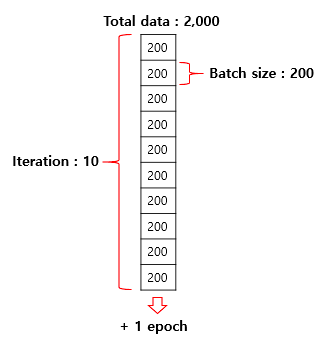

## 데이터 로드하기 

In [119]:
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader

- Dataset으로 데이터셋을 만들면 이를 이용해 데이터로더를 사용
- DataLoader
    - dataset과 batch_size를 인자로 받는다
    - batch_size는 통상적으로 2의 배수를 사용
    - shuffle=True인자를 사용하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순가 바뀜

In [120]:
x  =  torch.FloatTensor([[73,  80,  75], 
                           [93,  88,  93], 
                           [89,  91,  90], 
                           [96,  98,  100],   
                           [73,  66,  70]])  
y  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [123]:
# 텐서형테의 데이터를 받을때에는 TensorDataset를 사용
from torch.utils.data import TensorDataset
dataset = TensorDataset(x,y)

In [124]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [127]:
# batch_size가 2 이기때문에 두개가 한쌍을 이룸
list(dataloader)

[[tensor([[ 96.,  98., 100.],
          [ 93.,  88.,  93.]]),
  tensor([[196.],
          [185.]])],
 [tensor([[73., 80., 75.],
          [89., 91., 90.]]),
  tensor([[152.],
          [180.]])],
 [tensor([[73., 66., 70.]]), tensor([[142.]])]]

In [128]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [129]:
# dataloader가 3세트를 이루기 때문에 3batch씩 10epoch반복
for epoch in range(10 + 1):
    for batch_idx, samples in enumerate(dataloader):
   
        x_train, y_train = samples
    
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, 10, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/10 Batch 1/3 Cost: 44327.171875
Epoch    0/10 Batch 2/3 Cost: 10033.855469
Epoch    0/10 Batch 3/3 Cost: 2258.893311
Epoch    1/10 Batch 1/3 Cost: 1216.072144
Epoch    1/10 Batch 2/3 Cost: 557.448486
Epoch    1/10 Batch 3/3 Cost: 262.458679
Epoch    2/10 Batch 1/3 Cost: 39.818665
Epoch    2/10 Batch 2/3 Cost: 15.440739
Epoch    2/10 Batch 3/3 Cost: 2.757791
Epoch    3/10 Batch 1/3 Cost: 12.319376
Epoch    3/10 Batch 2/3 Cost: 2.018374
Epoch    3/10 Batch 3/3 Cost: 15.770846
Epoch    4/10 Batch 1/3 Cost: 4.162767
Epoch    4/10 Batch 2/3 Cost: 6.820552
Epoch    4/10 Batch 3/3 Cost: 16.022591
Epoch    5/10 Batch 1/3 Cost: 7.107206
Epoch    5/10 Batch 2/3 Cost: 4.565801
Epoch    5/10 Batch 3/3 Cost: 15.153234
Epoch    6/10 Batch 1/3 Cost: 4.444887
Epoch    6/10 Batch 2/3 Cost: 6.947250
Epoch    6/10 Batch 3/3 Cost: 10.440168
Epoch    7/10 Batch 1/3 Cost: 2.658041
Epoch    7/10 Batch 2/3 Cost: 17.536879
Epoch    7/10 Batch 3/3 Cost: 4.148447
Epoch    8/10 Batch 1/3 Cost: 8.140711

## 커스텀 데이터셋

```
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  데이터셋의 길이(총 샘플의 수)를 적어주는 부분

  def __getitem__(self, idx): 
  데이터셋에서 특정 1개의 샘플을 가져오는 함수
```

In [130]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [145]:
class CustomDataset(Dataset): 
    def __init__(self): # 데이터 정의 
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]


    def __len__(self): 
        return len(self.x_data) # 총 데이터의 개수 리턴

    # 인덱스에 따른 데이터를 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [146]:
dataset = CustomDataset()

In [147]:
list(dataset)

[(tensor([73., 80., 75.]), tensor([152.])),
 (tensor([93., 88., 93.]), tensor([185.])),
 (tensor([89., 91., 90.]), tensor([180.])),
 (tensor([ 96.,  98., 100.]), tensor([196.])),
 (tensor([73., 66., 70.]), tensor([142.]))]

In [148]:
len(dataset)

5

In [149]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [150]:
list(dataloader)

[[tensor([[93., 88., 93.],
          [73., 66., 70.]]),
  tensor([[185.],
          [142.]])],
 [tensor([[ 73.,  80.,  75.],
          [ 96.,  98., 100.]]),
  tensor([[152.],
          [196.]])],
 [tensor([[89., 91., 90.]]), tensor([[180.]])]]

In [151]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [152]:
for epoch in range(20 + 1):
    for batch_idx, samples in enumerate(dataloader):
     
        x, y = samples

        prediction = model(x)

        cost = F.mse_loss(prediction, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, 20, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 46581.128906
Epoch    0/20 Batch 2/3 Cost: 8319.543945
Epoch    0/20 Batch 3/3 Cost: 1905.216675
Epoch    1/20 Batch 1/3 Cost: 1733.591797
Epoch    1/20 Batch 2/3 Cost: 274.044495
Epoch    1/20 Batch 3/3 Cost: 75.135796
Epoch    2/20 Batch 1/3 Cost: 49.382629
Epoch    2/20 Batch 2/3 Cost: 17.859125
Epoch    2/20 Batch 3/3 Cost: 4.496773
Epoch    3/20 Batch 1/3 Cost: 2.383482
Epoch    3/20 Batch 2/3 Cost: 0.288324
Epoch    3/20 Batch 3/3 Cost: 0.502854
Epoch    4/20 Batch 1/3 Cost: 0.378316
Epoch    4/20 Batch 2/3 Cost: 0.101761
Epoch    4/20 Batch 3/3 Cost: 0.544811
Epoch    5/20 Batch 1/3 Cost: 0.379561
Epoch    5/20 Batch 2/3 Cost: 0.164343
Epoch    5/20 Batch 3/3 Cost: 0.587889
Epoch    6/20 Batch 1/3 Cost: 0.511740
Epoch    6/20 Batch 2/3 Cost: 0.304086
Epoch    6/20 Batch 3/3 Cost: 0.314264
Epoch    7/20 Batch 1/3 Cost: 0.272694
Epoch    7/20 Batch 2/3 Cost: 0.123961
Epoch    7/20 Batch 3/3 Cost: 0.389539
Epoch    8/20 Batch 1/3 Cost: 0.194443
Epoch  